In [2]:
# Import libraries
import math
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from bs4 import BeautifulSoup

In [3]:
DATA_PATH = 'data/hardware/'

In this notebook, the data about hardware equipment for different mining algorithms is collected, cleaned and saved for later use

**STANDARD UNITS**
- hashing_power : h/s
- power : W
- consumption : J/h
- efficiency : h/J


# GPU's

## SHA256

In [4]:
SHA256 = pd.read_csv(DATA_PATH + 'SHA256_mining_hardware.csv',parse_dates=['Date of release'])
# Rename columns
SHA256 = SHA256.rename(columns={'Miner_name': 'name', 'Date of release':'release_date', 'UNIX_date_of_release': 'UNIX_release_date',\
                       'Hashing power (Th/s)': 'hashing_power', 'Power (W)': 'power', 'Efficiency_J_Gh': 'consumption', 'Qty': 'qty'})
# Drop some columns
SHA256 = SHA256.dropna().reset_index(drop=True)
SHA256['release_date'] = SHA256['release_date'].apply(lambda x: datetime.strptime(x,'%m.%Y'))
SHA256 = SHA256.drop(columns=['UNIX_release_date','qty'])
SHA256['type'] = 'ASIC'
SHA256['power'] = SHA256['power'].str.replace(',','').astype(float)
SHA256

,name,release_date,hashing_power,power,consumption,type
0,Bitmain Antminer S3,2014-07-01,0.0,366.0,0.76569,ASIC
1,Bitmain Antminer S5,2014-12-01,1.0,590.0,0.51082,ASIC
2,Bitmain Antminer S7,2015-09-01,5.0,1293.0,0.27336,ASIC
3,Bitmain Antminer S9 (11.5Th),2016-06-01,12.0,1127.0,0.09800,ASIC
4,Bitmain Antminer S7-LN,2016-06-01,3.0,697.0,0.25815,ASIC
...,...,...,...,...,...,...
74,Canaan AvalonMiner 1047,2019-09-01,37.0,2380.0,0.06432,ASIC
75,Bitmain Antminer S17e,2019-11-01,64.0,2880.0,0.04500,ASIC
76,Bitmain Antminer T17e,2019-11-01,53.0,2915.0,0.05500,ASIC
77,Bitmain Antminer S17+,2019-12-01,73.0,2920.0,0.04000,ASIC


The units currently are

- hashing_power : Th/s
- power : W
- efficiency : J/Gh
- Qty: estimate of amount sold

Let us convert these to the standard units

In [5]:
# Convert to standard units
SHA256['hashing_power'] = SHA256['hashing_power']*10**12
SHA256['consumption'] = SHA256['consumption']/10**9
SHA256['efficiency'] = 1/SHA256['consumption']

In [6]:
SHA256.to_csv(DATA_PATH+'SHA256_hardware_clean.csv')

## Ethash

In [6]:
ethash = pd.read_csv(DATA_PATH + 'Ethash_mining_hardware.csv',parse_dates=['Release date'], encoding='utf-8')
ethash = ethash.dropna().reset_index(drop=True).drop(columns=['Number','Type','Source','Accessed on', 'Manufacturer'])
ethash = ethash.rename(columns={'Product': 'name','Release date':'release_date','Hash rate in Mh/s': 'hashing_power', 'Power in W': 'power', 'Efficiency in Mh/J': 'efficiency'})
ethash['type'] = 'GPU'
ethash[:4]

,release_date,name,hashing_power,power,efficiency,type
0,2012-03-19,Radeon HD 7870,10.0,175.0,0.06,GPU
1,2012-03-22,GeForce GTX 680,15.0,195.0,0.08,GPU
2,2012-08-16,GeForce GTX 660 Ti,12.0,150.0,0.08,GPU
3,2012-09-10,GeForce GTX 650 Ti,10.0,110.0,0.09,GPU


**units**

- hashing_power : Mh/s
- power : W
- efficiency : Mh/J

In [7]:
# Convert to standard units
ethash['hashing_power'] = ethash['hashing_power']*10**6
ethash['efficiency'] = ethash['efficiency']*10**6
ethash['consumption'] = 1/ethash['efficiency']
ethash[:4]

,release_date,name,hashing_power,power,efficiency,type,consumption
0,2012-03-19,Radeon HD 7870,10000000.0,175.0,60000.0,GPU,0.000017
1,2012-03-22,GeForce GTX 680,15000000.0,195.0,80000.0,GPU,0.000013
2,2012-08-16,GeForce GTX 660 Ti,12000000.0,150.0,80000.0,GPU,0.000013
3,2012-09-10,GeForce GTX 650 Ti,10000000.0,110.0,90000.0,GPU,0.000011


In [42]:
ethash.shape

(44, 7)

In [8]:
ethash.to_csv(DATA_PATH+'ethash_hardware_clean.csv')

## Equihash
[data](https://en.wikibooks.org/wiki/ZCash_mining_GPU_Comparison#GPU_Miner_Comparison)

In [9]:
equihash = pd.read_csv(DATA_PATH+'equihash_mining_hardware.csv')
#equihash = equihash.drop(columns=['Core Clock', 'Intensity level', 'Mem Clock', 'Driver', 'info', 'OS', 'Submitted by'])
equihash = equihash.astype(str)
equihash = equihash.rename(columns={'Brand': 'brand', 'GPU':'name','Hash Rate': 'hashing_power', 'Watts': 'power', 'Efficiency': 'efficiency', 'Cost': 'cost'})
equihash['type'] = 'GPU'
equihash

,brand,name,hashing_power,power,cost,efficiency,type
0,ASUS,GTX 1070 8GB Dual OC,460 Sol\s,115w,£379.99 UK,3.99 Sol\w,GPU
1,nan,nan,nan,nan,nan,nan,GPU
2,MSI,GTX 980ti 6GB Gaming,460 Sol\s,nan,£230 UK,2.27 Sol\w,GPU
3,nan,nan,nan,nan,nan,nan,GPU
4,Gigabyte,R7 260x 2GB,105 Sol\s,nan,£30 UK,nan,GPU
...,...,...,...,...,...,...,...
154,NVIDIA,Quadro K4200 8Gb,55,nan,nan,nan,GPU
155,NVIDIA,Quadro M4000 16Gb,150,nan,nan,nan,GPU
156,Sapphire,HD 7950 3G with Boost,300-305,nan,Used ~$90,nan,GPU
157,MSI,GTX 1050Ti,200,79W,ZAR3100,nan,GPU


In [10]:
for i in range(equihash.shape[0]):
    if equihash.loc[i]["brand"] == 'nan':
        equihash.loc[i]["brand"] = equihash.loc[i-1]["brand"]
    if equihash.loc[i]["name"] == 'nan':
        equihash.loc[i]["name"] = equihash.loc[i-1]["name"]

In [11]:
#Delete if efficiency is unkown AND (hash_rate or power) unknown, because then we can't calculate efficiency
equihash = equihash[~((equihash["efficiency"]=='nan') & ((equihash["hashing_power"]=='nan') | (equihash["power"]=='nan')))].reset_index(drop=True)
equihash

,brand,name,hashing_power,power,cost,efficiency,type
0,ASUS,GTX 1070 8GB Dual OC,460 Sol\s,115w,£379.99 UK,3.99 Sol\w,GPU
1,MSI,GTX 980ti 6GB Gaming,460 Sol\s,nan,£230 UK,2.27 Sol\w,GPU
2,Gigabyte,GTX 1050 2Gb,172,67.5,135 €,nan,GPU
3,Gigabyte,AORUS GeForce GTX 1080 Ti 11G,785,300,new 800$ with tax; Dec-2017,2.62 Sol/W,GPU
4,Gigabyte,GTX 1080 Ti Waterforce 11GD,730 Avg,225,nan,3.25 Sol/w,GPU
...,...,...,...,...,...,...,...
78,NVIDIA,Tesla M2050 3GB,152,225W,Used,nan,GPU
79,NVIDIA,Tesla V100 16Gb,963 sol/s,260,8000 for solo card.,nan,GPU
80,NVIDIA,Tesla M2070 6GB,165,225W,nan,nan,GPU
81,MSI,GTX 1050Ti,200,79W,ZAR3100,nan,GPU


In [12]:
equihash = equihash.set_index(['brand','name']).drop_duplicates().reset_index()
equihash = equihash.drop(columns=['brand','cost'])

In [13]:
equihash['hashing_power'] = equihash['hashing_power'].str.strip('sSoOlL/\\aAvVgG')
equihash['efficiency'] = equihash['efficiency'].str.strip('sSoOlL/\\aAvVgGwW')
equihash['power'] = equihash['power'].str.strip('wW')
equihash

,name,hashing_power,power,efficiency,type
0,GTX 1070 8GB Dual OC,460,115,3.99,GPU
1,GTX 980ti 6GB Gaming,460,nan,2.27,GPU
2,GTX 1050 2Gb,172,67.5,nan,GPU
3,AORUS GeForce GTX 1080 Ti 11G,785,300,2.62,GPU
4,GTX 1080 Ti Waterforce 11GD,730,225,3.25,GPU
...,...,...,...,...,...
77,Tesla M2050 3GB,152,225,nan,GPU
78,Tesla V100 16Gb,963,260,nan,GPU
79,Tesla M2070 6GB,165,225,nan,GPU
80,GTX 1050Ti,200,79,nan,GPU


In [14]:
def clean_avg(two_numbers):
    ''' 
    Sometimes hashing power is written as 500-510, returns avg of those two
    '''
    if '-' in two_numbers:
        return (int(two_numbers.split('-')[0])+int(two_numbers.split('-')[1]))/2
    return two_numbers

In [15]:
equihash['hashing_power'] = equihash['hashing_power'].apply(lambda x: clean_avg(x)).astype(int)
equihash['power'] = equihash['power'].astype(float)
equihash['efficiency'] = equihash['efficiency'].astype(float)

In [16]:
equihash['efficiency'] = equihash.apply(lambda x: x.hashing_power/x.power if math.isnan(x.efficiency) else x.efficiency,axis=1)
equihash['consumption'] = 1/equihash['efficiency']

In [17]:
equihash

,name,hashing_power,power,efficiency,type,consumption
0,GTX 1070 8GB Dual OC,460,115.0,3.990000,GPU,0.250627
1,GTX 980ti 6GB Gaming,460,NaN,2.270000,GPU,0.440529
2,GTX 1050 2Gb,172,67.5,2.548148,GPU,0.392442
3,AORUS GeForce GTX 1080 Ti 11G,785,300.0,2.620000,GPU,0.381679
4,GTX 1080 Ti Waterforce 11GD,730,225.0,3.250000,GPU,0.307692
...,...,...,...,...,...,...
77,Tesla M2050 3GB,152,225.0,0.675556,GPU,1.480263
78,Tesla V100 16Gb,963,260.0,3.703846,GPU,0.269990
79,Tesla M2070 6GB,165,225.0,0.733333,GPU,1.363636
80,GTX 1050Ti,200,79.0,2.531646,GPU,0.395000


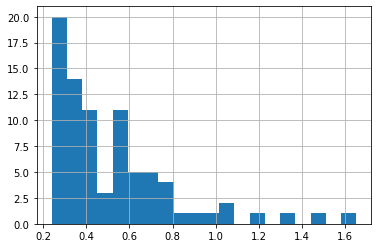

In [18]:
equihash['consumption'].hist(bins=20)
plt.show()

In [19]:
equihash.to_csv(DATA_PATH+'equihash_hardware_clean.csv')

## Scrypt

In [20]:
scrypt = pd.read_csv(DATA_PATH+'Scrypt_mining_hardware.csv')
scrypt = scrypt.drop(columns=['C','M','V','Miner','Config','Notes (OS/TEMPS/DRIVERS/HARDWARE/FIRMWARE)'])
scrypt

,Type,Model,kH/s,W
0,AMD GPU,4350,10,NaN
1,AMD GPU,4770,116,NaN
2,AMD GPU,4850,100,NaN
3,AMD GPU,4850,110,110
4,AMD GPU,4850,126,115
...,...,...,...,...
491,Other,Fujitsu SPARC64-VII,8.96,NaN
492,Other,Oracle UltraSPARC T2,2.48,123
493,Other,Oracle UltraSPARC T4,11.87,NaN
494,Other,IBM Power 7,16.4,NaN


In [21]:
# Drop the incomplete values
scrypt = scrypt.dropna().reset_index(drop=True)

In [22]:
# Clean hashes
scrypt['kH/s'] = scrypt['kH/s'].str.strip('~').str.strip().astype(str)
scrypt['kH/s'] = scrypt['kH/s'].apply(clean_avg)
scrypt['kH/s'] = scrypt['kH/s'].astype(float)*1000 # Convert to std unit

In [23]:
scrypt['W'] = scrypt['W'].str.replace('[a-zA-Z(\(\)]+', '', regex=True).str.replace('^\s*$', 'nan', regex=True).astype(float)

In [24]:
scrypt = scrypt.rename(columns={'Type': 'type', 'Model':'name','kH/s':'hashing_power','W':'power'})
scrypt = scrypt.groupby(['type','name']).mean().reset_index()
scrypt['name'] = scrypt['type'] + ' '+ scrypt['name']
scrypt['type'] = 'GPU' #Also CPU's etc...

In [25]:
scrypt['efficiency'] = scrypt['hashing_power']/scrypt['power']
scrypt['consumption'] = 1/scrypt['efficiency']

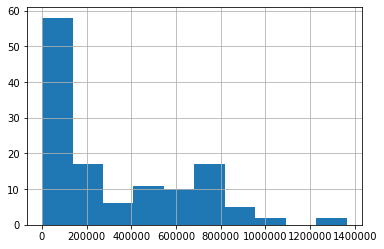

In [26]:
scrypt['hashing_power'].hist()
plt.show()

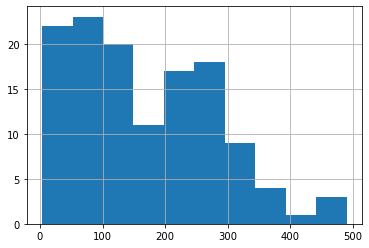

In [27]:
scrypt['power'].hist()
plt.show()

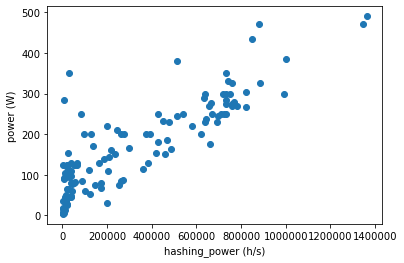

In [28]:
plt.scatter(scrypt['hashing_power'],scrypt['power'])
plt.xlabel('hashing_power (h/s)')
plt.ylabel('power (W)')
plt.show()

In [43]:
scrypt.shape

(128, 6)

In [29]:
scrypt.to_csv(DATA_PATH+'scrypt_hardware_clean.csv')

# ASIC's

Data from https://whattomine.com/miners

In [30]:
# Top 100 mineable coins
url = 'https://whattomine.com/miners'

r = requests.get(url) 

page_body = r.text
soup = BeautifulSoup(page_body, 'html.parser')
table = soup.find_all('table', class_='table table-hover table-vcenter')

In [31]:
# Get column names
column_names = []
for header in table[0].find_all('th'):
    header_text = str(header.string)
    # Happens when link in header title
    if header_text == 'None':
        header_text = header.a.text
    column_names.append(header_text)

table_rows = table[0].find_all('tr')
l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
asic_data = pd.DataFrame(l, columns=column_names)
asic_data = asic_data.drop(0).reset_index(drop=True)
asic_data

,Model,Release Date,Hashrate,Power,Algo,Revenue 24h,Profit 24h,Top Coin
0,\n\nTodek Toddminer C1 Pro\n,\nApr 2020\n,3.00 Th/s,2700W,\nEaglesong\n,\n$31.72\n,\n$25.24\n,\n\n\n\n\nNervos(CKB)\nEaglesong\n\n
1,\n\nTodek Toddminer C1\n,\nMar 2020\n,1.60 Th/s,1380W,\nEaglesong\n,\n$16.92\n,\n$13.61\n,\n\n\n\n\nNervos(CKB)\nEaglesong\n\n
2,\n\nBitmain Antminer K5\n,\nApr 2020\n,1.13 Th/s,1580W,\nEaglesong\n,\n$11.95\n,\n$8.16\n,\n\n\n\n\nNervos(CKB)\nEaglesong\n\n
3,\n\nBitmain Antminer S19 Pro\n,\nComing in 2020\n,110.00 Th/s,3250W,\nSHA-256\n,\n$13.56\n,\n$5.76\n,\n\n\n\n\nBitcoin(BTC)\nSHA-256\n\n
4,\n\nInnosilicon A10 ETHMaster 500Mh\n,\nSep 2019\n,500.00 Mh/s,750W,\nEthash\n,\n$7.14\n,\n$5.34\n,\n\n\n\n\nEthereum(ETH)\nEthash\n\n
...,...,...,...,...,...,...,...,...
103,\n\nInnosilicon T2T-37T\n,\nSep 2019\n,37.00 Th/s,3100W,\nSHA-256\n,\n$4.56\n,\n-$2.88\n,\n\n\n\n\nBitcoin(BTC)\nSHA-256\n\n
104,\n\nEbang EBIT E10.2\n,\nJul 2019\n,27.00 Th/s,2700W,\nSHA-256\n,\n$3.33\n,\n-$3.15\n,\n\n\n\n\nBitcoin(BTC)\nSHA-256\n\n
105,\n\nStrongU STU-U1+\n,\nOct 2018\n,12.80 Th/s,1850W,\nBlake (14r)\n,\n$1.22\n,\n-$3.22\n,\n\n\n\n\nDecred(DCR)\nBlake (14r)\n\n
106,\n\nSpondoolies SPx36\n,\nSep 2018\n,540.00 Gh/s,4400W,\nX11\n,\n$7.20\n,\n-$3.36\n,\n\n\n\n\nDash(DASH)\nX11\n\n


In [32]:
def clean_columns(col):
    return col.str.strip('\n').str.strip().str.replace('\n', ' ')
def clean_price(price):
    return float(price.replace('$',''))

In [33]:
asic_data = asic_data.apply(clean_columns)
asic_data['Revenue 24h'] = asic_data['Revenue 24h'].apply(clean_price)
asic_data['Profit 24h'] = asic_data['Profit 24h'].apply(clean_price)
asic_data

,Model,Release Date,Hashrate,Power,Algo,Revenue 24h,Profit 24h,Top Coin
0,Todek Toddminer C1 Pro,Apr 2020,3.00 Th/s,2700W,Eaglesong,31.72,25.24,Nervos(CKB) Eaglesong
1,Todek Toddminer C1,Mar 2020,1.60 Th/s,1380W,Eaglesong,16.92,13.61,Nervos(CKB) Eaglesong
2,Bitmain Antminer K5,Apr 2020,1.13 Th/s,1580W,Eaglesong,11.95,8.16,Nervos(CKB) Eaglesong
3,Bitmain Antminer S19 Pro,Coming in 2020,110.00 Th/s,3250W,SHA-256,13.56,5.76,Bitcoin(BTC) SHA-256
4,Innosilicon A10 ETHMaster 500Mh,Sep 2019,500.00 Mh/s,750W,Ethash,7.14,5.34,Ethereum(ETH) Ethash
...,...,...,...,...,...,...,...,...
103,Innosilicon T2T-37T,Sep 2019,37.00 Th/s,3100W,SHA-256,4.56,-2.88,Bitcoin(BTC) SHA-256
104,Ebang EBIT E10.2,Jul 2019,27.00 Th/s,2700W,SHA-256,3.33,-3.15,Bitcoin(BTC) SHA-256
105,StrongU STU-U1+,Oct 2018,12.80 Th/s,1850W,Blake (14r),1.22,-3.22,Decred(DCR) Blake (14r)
106,Spondoolies SPx36,Sep 2018,540.00 Gh/s,4400W,X11,7.20,-3.36,Dash(DASH) X11


In [34]:
# Convert to std units
def clean_hashrate(hashrate):
    value, unit = hashrate.split(' ')
    if unit == 'Th/s':
        return float(value)*(10**12)
    if unit == 'Gh/s':
        return float(value)*(10**9)
    if unit == 'Mh/s':
        return float(value)*(10**6)
    if unit == 'kh/s':
        return float(value)*(10**3)

asic_data['Hashrate'] = asic_data['Hashrate'].apply(clean_hashrate)
asic_data['Power'] = asic_data['Power'].str.strip('W').astype(float)

In [35]:
asic_data['efficiency'] = asic_data['Hashrate']/asic_data['Power']
asic_data['consumption'] = 1/asic_data['efficiency']
asic_data = asic_data.rename(columns={'Model': 'name', 'Release Date': 'release_date', 'Hashrate': 'hashing_power', 'Power': 'power', 'Algo': 'algorithm'})
asic_data.loc[asic_data['release_date'] == "Coming in 2020",'release_date'] = "Jan 2020"
asic_data['release_date'] = asic_data['release_date'].apply(lambda x: datetime.strptime(x, "%b %Y"))
asic_data = asic_data.drop(columns=['Revenue 24h', 'Profit 24h', 'Top Coin'])
asic_data['type'] = 'ASIC'
asic_data

,name,release_date,hashing_power,power,algorithm,efficiency,consumption,type
0,Todek Toddminer C1 Pro,2020-04-01,3.000000e+12,2700.0,Eaglesong,1.111111e+09,9.000000e-10,ASIC
1,Todek Toddminer C1,2020-03-01,1.600000e+12,1380.0,Eaglesong,1.159420e+09,8.625000e-10,ASIC
2,Bitmain Antminer K5,2020-04-01,1.130000e+12,1580.0,Eaglesong,7.151899e+08,1.398230e-09,ASIC
3,Bitmain Antminer S19 Pro,2020-01-01,1.100000e+14,3250.0,SHA-256,3.384615e+10,2.954545e-11,ASIC
4,Innosilicon A10 ETHMaster 500Mh,2019-09-01,5.000000e+08,750.0,Ethash,6.666667e+05,1.500000e-06,ASIC
...,...,...,...,...,...,...,...,...
103,Innosilicon T2T-37T,2019-09-01,3.700000e+13,3100.0,SHA-256,1.193548e+10,8.378378e-11,ASIC
104,Ebang EBIT E10.2,2019-07-01,2.700000e+13,2700.0,SHA-256,1.000000e+10,1.000000e-10,ASIC
105,StrongU STU-U1+,2018-10-01,1.280000e+13,1850.0,Blake (14r),6.918919e+09,1.445313e-10,ASIC
106,Spondoolies SPx36,2018-09-01,5.400000e+11,4400.0,X11,1.227273e+08,8.148148e-09,ASIC


# Combining the data

In [36]:
# Create dict of algorithms with their hardware
algorithm_hardware = {'SHA-256':SHA256,'Ethash':ethash, 'Equihash':equihash, 'Scrypt':scrypt}

In [37]:
asic_data

,name,release_date,hashing_power,power,algorithm,efficiency,consumption,type
0,Todek Toddminer C1 Pro,2020-04-01,3.000000e+12,2700.0,Eaglesong,1.111111e+09,9.000000e-10,ASIC
1,Todek Toddminer C1,2020-03-01,1.600000e+12,1380.0,Eaglesong,1.159420e+09,8.625000e-10,ASIC
2,Bitmain Antminer K5,2020-04-01,1.130000e+12,1580.0,Eaglesong,7.151899e+08,1.398230e-09,ASIC
3,Bitmain Antminer S19 Pro,2020-01-01,1.100000e+14,3250.0,SHA-256,3.384615e+10,2.954545e-11,ASIC
4,Innosilicon A10 ETHMaster 500Mh,2019-09-01,5.000000e+08,750.0,Ethash,6.666667e+05,1.500000e-06,ASIC
...,...,...,...,...,...,...,...,...
103,Innosilicon T2T-37T,2019-09-01,3.700000e+13,3100.0,SHA-256,1.193548e+10,8.378378e-11,ASIC
104,Ebang EBIT E10.2,2019-07-01,2.700000e+13,2700.0,SHA-256,1.000000e+10,1.000000e-10,ASIC
105,StrongU STU-U1+,2018-10-01,1.280000e+13,1850.0,Blake (14r),6.918919e+09,1.445313e-10,ASIC
106,Spondoolies SPx36,2018-09-01,5.400000e+11,4400.0,X11,1.227273e+08,8.148148e-09,ASIC


In [38]:
def append_asic_to_gui(asic):
    alg = asic['algorithm']
    if alg in algorithm_hardware:
        algorithm_hardware[alg] = algorithm_hardware[alg].append(asic)
        return True
    return False
    

In [39]:
asic_data.apply(lambda x: append_asic_to_gui(x), axis=1)
for key in algorithm_hardware.keys():
    algorithm_hardware[key] = algorithm_hardware[key].drop(columns=['algorithm']).reset_index(drop=True)

In [40]:
asic_data[asic_data['algorithm'] == 'Equihash']

,name,release_date,hashing_power,power,algorithm,efficiency,consumption,type
7,Bitmain Antminer Z11,2019-04-01,135000.0,1418.0,Equihash,95.204513,0.010504,ASIC
8,Innosilicon A9++ ZMaster,2019-05-01,140000.0,1550.0,Equihash,90.322581,0.011071,ASIC
12,Innosilicon A9+ ZMaster,2019-01-01,120000.0,1550.0,Equihash,77.419355,0.012917,ASIC
17,Bitmain Antminer Z11J,2019-08-01,105000.0,1418.0,Equihash,74.047955,0.013505,ASIC
24,Innosilicon A9 ZMaster,2018-06-01,50000.0,620.0,Equihash,80.645161,0.012400,ASIC
48,Bitmain Antminer Z11E,2019-08-01,70000.0,1390.0,Equihash,50.359712,0.019857,ASIC
64,Bitmain Antminer Z9,2018-09-01,40700.0,1150.0,Equihash,35.391304,0.028256,ASIC


In [41]:
for key,value in algorithm_hardware.items():
    value.to_csv(DATA_PATH+key+'_hardware_clean.csv')